In [ ]:
import pandas as pd           # Used for data manipulation and analysis (e.g., reading CSV files, working with DataFrames)
import numpy as np            # Used for numerical operations, arrays, and mathematical functions
import seaborn as sns         # Used for data visualization (especially statistical plots like heatmaps, histograms, etc.)
import matplotlib.pyplot as plt  # Used for creating plots and graphs (line plots, bar charts, scatter plots, etc.)
from sklearn.model_selection import train_test_split  # Used to split dataset into training and testing sets
from sklearn.svm import SVC   # Support Vector Classification model from scikit-learn
from sklearn.metrics import accuracy_score  # Used to evaluate classification model accuracy
import pickle                 # Used for saving (serializing) and loading (deserializing) Python objects (e.g., ML models)


## Data Collection


In [ ]:
class DataCollector:
    def __init__(self, source_path):
        self.source_path = "winequality-red.csv"
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.source_path)
        print(f"Data loaded successfully from {self.source_path}")
        return self.data

    def get_data_summary(self):
        if self.data is None:
            print("Data not loaded yet. Please run load_data() first.")
            return
        print("Data Info:")
        print(self.data.info())
        print("\nFirst 5 rows:")
        print(self.data.head())
        
collector = DataCollector('winequality-red.csv')
data = collector.load_data()
collector.get_data_summary()


Data loaded successfully from winequality-red.csv
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

First 5 rows:
   fixed acidity  volatile acidity  citric ac

## Data Understanding

In [ ]:
class DataUnderstanding:
    def __init__(self, data):
        """Initialize with a pandas DataFrame"""
        self.data = data

    def overview(self):
        """ Display basic info and stats about the dataset"""
        print("Shape of the data:", self.data.shape)
        print("\nData types:\n", self.data.dtypes)
        print("\nMissing values:\n", self.data.isnull().sum())
        print("\nStatistical summary:\n", self.data.describe(include='all'))

    def unique_values(self, column):
        """Print unique values in a column"""
        unique_vals = self.data[column].unique()
        print(f"Unique values in '{column}':\n{unique_vals}")
        
understanding = DataUnderstanding(data)
understanding.overview()
understanding.unique_values('quality')


Shape of the data: (1599, 12)

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Statistical summary:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.27097

## DATA Preprocessing

In [ ]:
class DataPreprocessing:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def drop_columns(self, columns):
        # Drop specified columns from the dataset
        self.data = self.data.drop(columns=columns)

    def fill_missing_with_mean(self, columns):
        # Fill missing values in specified columns with mean
        for col in columns:
            mean_val = self.data[col].mean()
            self.data[col] = self.data[col].fillna(mean_val)

    def fill_missing_with_mode(self, columns):
        # Fill missing values in specified columns with mode
        for col in columns:
            mode_val = self.data[col].mode()[0]
            self.data[col] = self.data[col].fillna(mode_val)

    def encode_categorical(self, columns):
        # Convert categorical columns to dummy/one-hot encoding
        self.data = pd.get_dummies(self.data, columns=columns)

    def normalize_columns(self, columns):
        # Normalize specified numeric columns (Min-Max scaling)
        for col in columns:
            min_val = self.data[col].min()
            max_val = self.data[col].max()
            self.data[col] = (self.data[col] - min_val) / (max_val - min_val)

preprocessor = DataPreprocessing(data)

# Drop irrelevant or too specific columns
preprocessor.drop_columns([ 'chlorides' ])

# Fill missing numeric values
preprocessor.fill_missing_with_mean(['alcohol', 'quality',  ])

# Fill missing categorical values
preprocessor.fill_missing_with_mode([ ])

# Encode categorical features
preprocessor.encode_categorical([ 'quality'])


# Final clean data
processed_data = preprocessor.data
print(processed_data.head())




   fixed acidity  volatile acidity  citric acid  residual sugar  \
0            7.4              0.70         0.00             1.9   
1            7.8              0.88         0.00             2.6   
2            7.8              0.76         0.04             2.3   
3           11.2              0.28         0.56             1.9   
4            7.4              0.70         0.00             1.9   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality_3  quality_4  quality_5  quality_6  quality_7  quality_8  
0      9.4      False      False       True      False      False      Fa

## univariate analysis
Univariate analysis is the simplest form of data analysis, where only one variable is analyzed at a time. The main purpose is to describe, summarize, and understand the distribution and characteristics of that single variable.

Key Features of Univariate Analysis:
Focuses on one variable only.

Aims to understand the central tendency, dispersion, and shape of the data distribution.

Often the first step in data exploration.

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


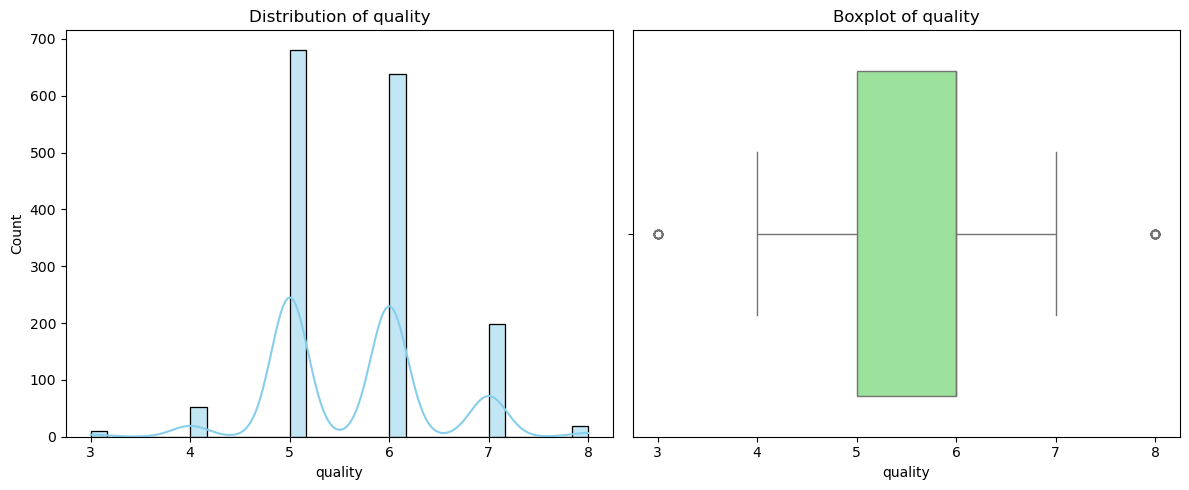

In [ ]:
class UnivariateAnalysis:
    def __init__(self, data):
        """Initialize with a pandas DataFrame"""
        self.data = data

    def describe_column(self, column):
        """Print basic statistics of a column"""
        print(self.data[column].describe())

    def plot_numeric(self, column, bins=30, hist_color='skyblue', box_color='lightgreen',
                 fig_width=12, fig_height=5, subplot_row1=1, subplot_col1=2, index1=1,
                 subplot_row2=1, subplot_col2=2, index2=2):
        plt.figure(figsize=(fig_width, fig_height))

        plt.subplot(subplot_row1, subplot_col1, index1)
        sns.histplot(self.data[column], kde=True, bins=bins, color=hist_color)
        plt.title(f'Distribution of {column}')

        plt.subplot(subplot_row2, subplot_col2, index2)
        sns.boxplot(x=self.data[column], color=box_color)
        plt.title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()

        
    def plot_categorical(self, column, hue=None, palette='Set2', legend=False, width=6, height=4, rotation=45):
        plt.figure(figsize=(width, height))
        sns.countplot(data=self.data, x=column, hue= column, palette=palette, legend=legend)
        plt.title(f'Frequency of {column}')
        plt.xticks(rotation=rotation)
        plt.show()


        
uni = UnivariateAnalysis(data)

"""For numeric column"""
uni.describe_column('quality')
uni.plot_numeric('quality')





count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


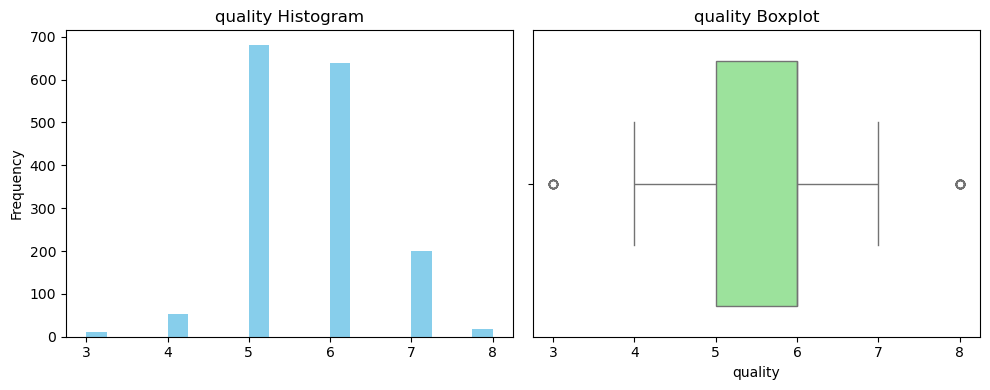

In [ ]:
class UnivariateAnalysis:
    def __init__(self, data):
        self.data = data

    def describe_column(self, column):
        print(self.data[column].describe())

    def plot_numeric(self, column):
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        self.data[column].plot(kind='hist', bins=20, color='skyblue')
        plt.title(f'{column} Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.data[column], color='lightgreen')
        plt.title(f'{column} Boxplot')

        plt.tight_layout()
        plt.show()

    def plot_categorical(self, column):
        plt.figure(figsize=(8, 4))
        self.data[column].value_counts().plot(kind='bar', color='orange')
        plt.title(f'{column} Count Plot')
        plt.xticks(rotation=45)
        plt.show()
uni = UnivariateAnalysis(data)

# For numeric column
uni.describe_column('quality')
uni.plot_numeric('quality')




## Bivariate analysis
Bivariate analysis involves the analysis of two variables to explore the relationship or correlation between them. It helps in identifying patterns, associations, or dependencies between variables.

Key Goals of Bivariate Analysis:
Understand how one variable changes with respect to another

Identify correlation, association, or causation

Explore relationships between:

Two numerical variables

One numerical and one categorical variable

Two categorical variables




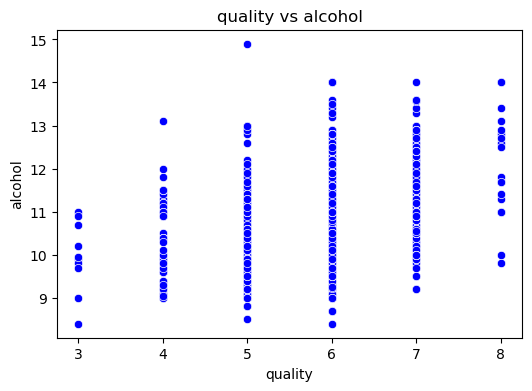

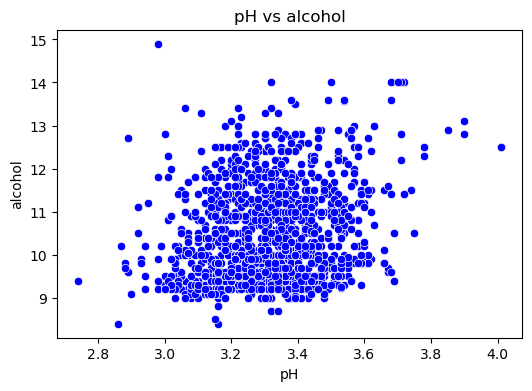

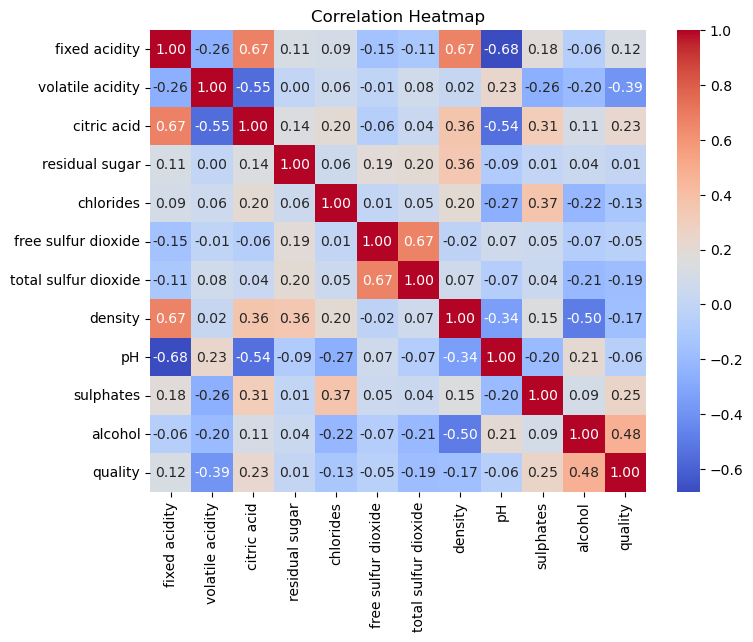

In [ ]:

class BivariateAnalysis:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def scatter_plot(self, x, y, width=6, height=4, point_color='b', title=None, xlabel=None, ylabel=None):
        """ Scatter plot for numeric vs numeric"""
        plt.figure(figsize=(width, height))
        sns.scatterplot(x=self.data[x], y=self.data[y], color=point_color)
        plt.title(title or f'{x} vs {y}')
        plt.xlabel(xlabel or x)
        plt.ylabel(ylabel or y)
        plt.show()    


    def correlation_heatmap(self, width=8, height=6, cmap='coolwarm', fmt=".2f", annot=True, title='Correlation Heatmap'):
        """Correlation heatmap for numeric columns"""
        plt.figure(figsize=(width, height))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=annot, cmap=cmap, fmt=fmt)
        plt.title(title)
        plt.show()

        
biv = BivariateAnalysis(data)

"""Numeric vs numeric"""
biv.scatter_plot('quality', 'alcohol')
biv.scatter_plot('pH', 'alcohol')

"""Correlation heatmap"""
biv.correlation_heatmap()


## data spilting

In [ ]:
class Data_Splitter:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column

    def split(self, test_size=0.4, random_state=42):
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        return X_train, X_test, y_train, y_test
splitter = Data_Splitter(data, 'quality')
X_train, X_test, y_train, y_test = splitter.split(test_size=0.2)
print(X_train, X_test, y_train, y_test)

    


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493             8.7             0.690         0.31             3.0      0.086   
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  

## data training

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

class ModelTrainer:
    def __init__(self, X_train, y_train):
        # Store training data
        self.X_train = X_train
        self.y_train = y_train
        self.model = None

    def train_svm(self, kernel='rbf', C=1.0, epsilon=0.1):
        # Train SVM Regression model
        self.model = SVR(kernel=kernel, C=C, epsilon=epsilon)
        self.model.fit(self.X_train, self.y_train)
        print("SVM model trained successfully.")
        return self.model

    def evaluate(self, X_test, y_test):
        # Evaluate the trained model
        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R² Score: {r2:.2f}")
trainer = ModelTrainer(X_train, y_train)

# Train the model
svm_model = trainer.train_svm(kernel='rbf', C=10, epsilon=0.2)

# Evaluate the model
trainer.evaluate(X_test, y_test)


SVM model trained successfully.
Mean Squared Error: 0.45
R² Score: 0.31


## plot graphs

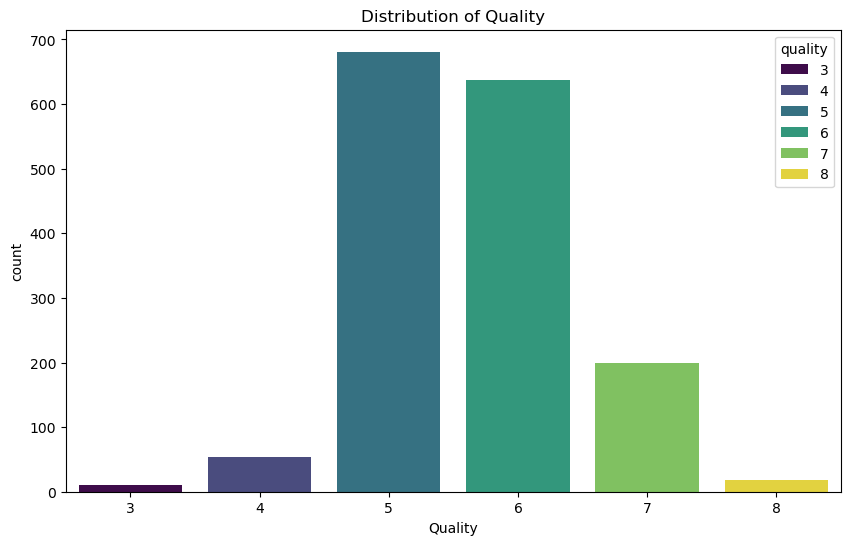

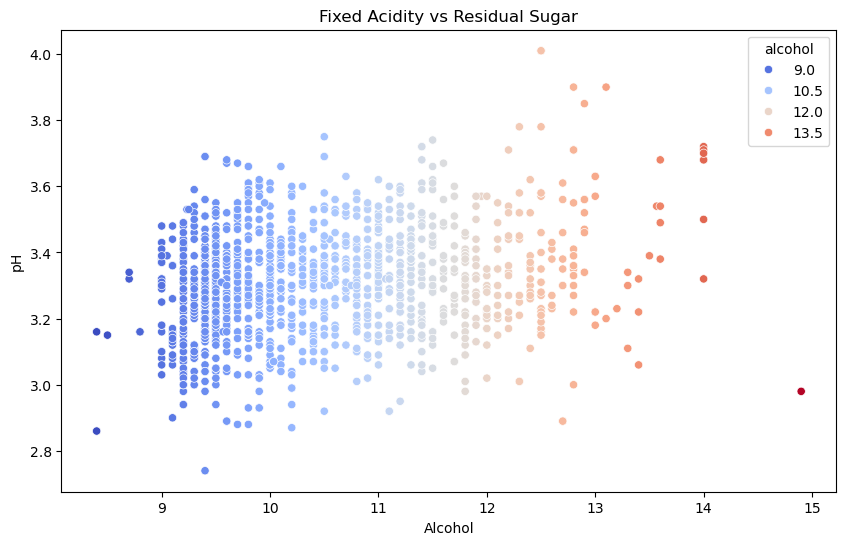

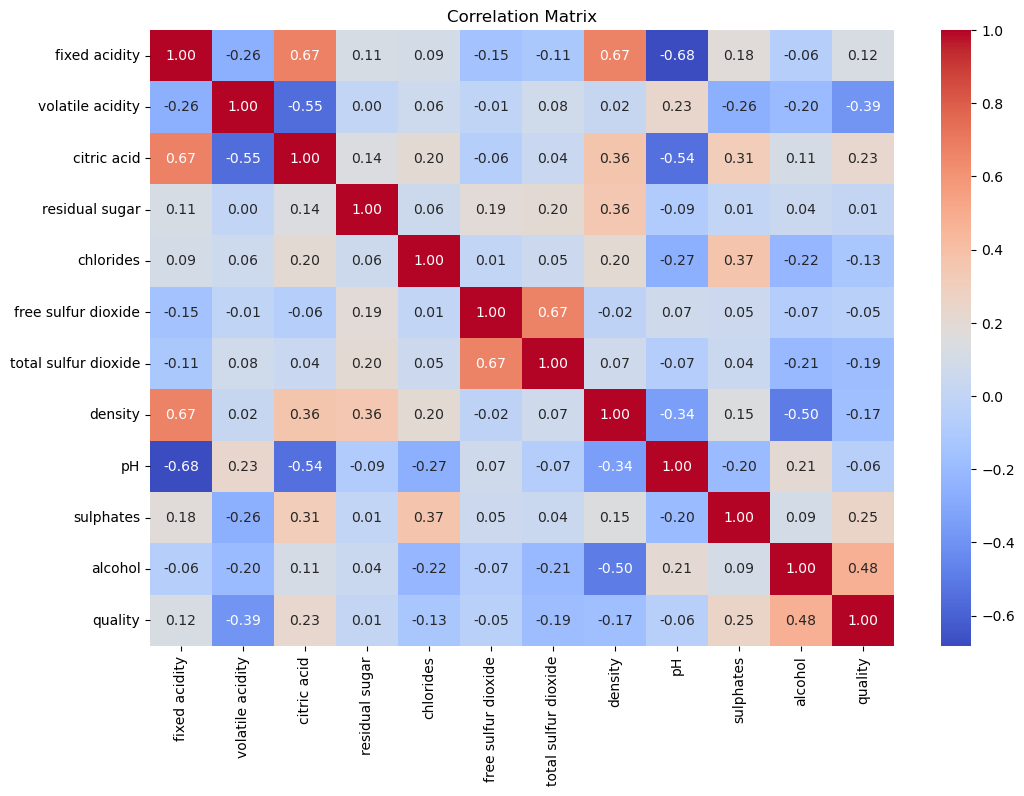

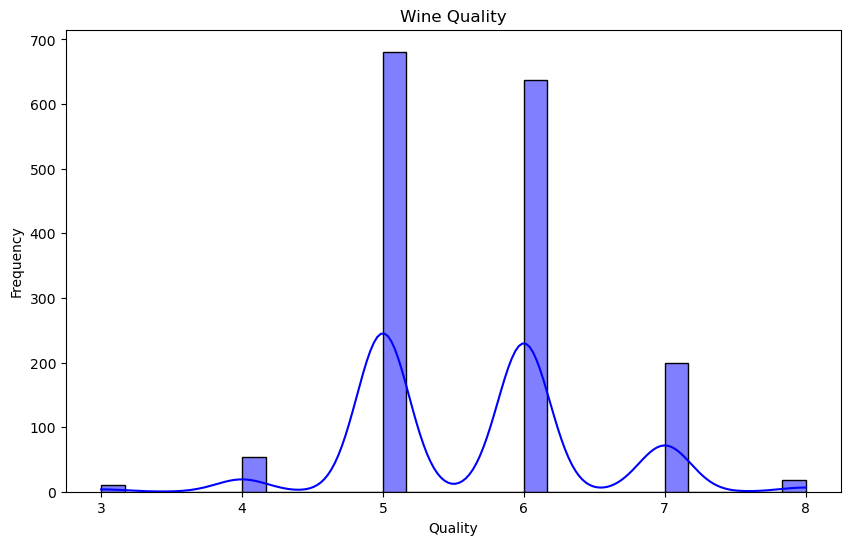

In [ ]:
class visualiser:
    def __init__(self, data):
        self.data = data

    def plot_quality_distributor(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.data, x='quality', hue='quality', palette='viridis')
        plt.title('Distribution of Quality')
        plt.xlabel('Quality')

    def plot_alcohol_vs_pH(self):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.data, x='alcohol', y='pH', hue='alcohol', palette='coolwarm')
        plt.title('Fixed Acidity vs Residual Sugar')
        plt.xlabel('Alcohol')
        plt.ylabel('pH')

    def plot_correlation_matrix(self):
        plt.figure(figsize=(12, 8))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.show()

    def plot_quality(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.data, x='quality', kde=True, color='blue', bins=30)
        plt.title('Wine Quality')
        plt.xlabel('Quality')
        plt.ylabel('Frequency')
        plt.show()

viz= visualiser(data)
# Plot the distribution of Quality
viz.plot_quality_distributor()
# Plot Fixed Acidity vs Residual Sugar
viz.plot_alcohol_vs_pH()
# Plot the correlation matrix
viz.plot_correlation_matrix()
# Plot Wine Quality
viz.plot_quality()
# Show all plots
plt.show()                 

# Model storage using pickle

In [ ]:
import pickle

class ModelStorage:
    def __init__(self, model):
        # Store the trained model
        self.model = model

    def save_model(self, filename):
        # Save the model to a file
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)
        print("Model saved to", filename)

    def load_model(self, filename):
        # Load a model from file
        with open(filename, 'rb') as file:
            self.model = pickle.load(file)
        print("Model loaded from", filename)
        return self.model
# Save the trained model
storage = ModelStorage(svm_model)
storage.save_model('svm_admission_model.pkl')

# Load it later
loaded_model = storage.load_model('svm_admission_model.pkl')


Model saved to svm_admission_model.pkl
Model loaded from svm_admission_model.pkl
